In [1]:
import numpy as np
import pandas as pd

np.random.seed(5)

# 1. 문제 정의
* 서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류해 보는 예제

# 2. 데이터 수집
아래는 서울의 대표적인 구(district) 위치 데이터.
구(district) 정보는 학습에 사용하도록 함.

#### 컬럼 주석
- **district** : 행정구역(서초구, 송파구, 용산구등 서울의 단위 지역 분류)
- **dong** : 구(district)보다 작은 행정구역(대치동, 도곡동, 암사동 등 서울의 소단위 분류)
- **longitude** : 경도
- **latitude** : 위도
- **label** : 한강 기준으로 동, 서, 남, 북으로 구분한 지역 명칭

In [2]:
district_dict_list = [ #훈련용
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']] #데이터만을 뽑아오도록 함.
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [3]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [4]:
dong_dict_list = [ #검증용 데이터(테스트용)
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


In [5]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

레이블의 갯수를 확인한 결과, 데이터는 Gangbuk(강북), Gangdong(강동), Gangseo(강서), Gangnam(강남)이라는 4가지 분류값을 가지고 있음.       
이번 예제에서는 위도와 경도 정보만으로, 그 지역의 레이블을 예측해 볼 수 있도록, 데이터를 전처리.

## 데이터 전처리
먼저, 경도와 위도의 평균과 편차를 보도록 함.

In [6]:
train_df.describe() 
# R에서 제공해주고 있었던 summery의 통계학적 의미를 가지는 값들을 빠르게 찾거나 계산해서 보여주는 함수를 describe로 동일하게 제공

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


이번 예제는 의사결정트리 알고리즘으로 데이터를 분류.   
의사결정트리는 각 특징을 독립적으로 사용하기 때문에, 이번 예제에서는 별다른 전처리 과정이 필요없음.

In [8]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


In [9]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


## 데이터 시각화

Text(0.5, 1.0, 'district visualization in 2d plane')

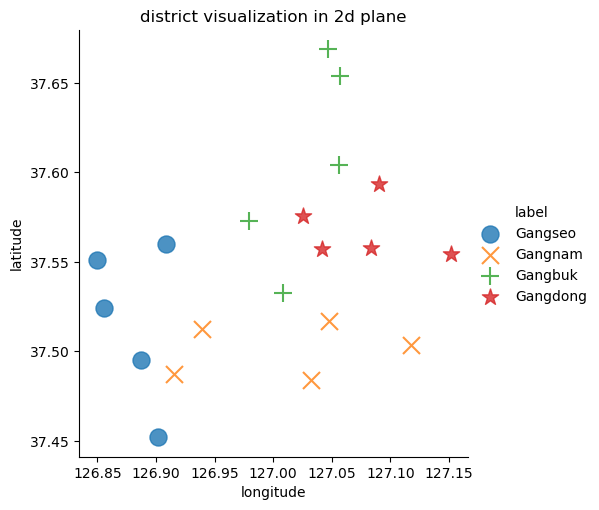

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(train_df, x='longitude', y='latitude', fit_reg=False, 
           hue='label',
           markers=['o', 'x', '+', '*'],
           scatter_kws={'s':150}
           ) #fit_reg_False => 회귀추정선을 그려주지 않도록 함 / scatter_kws => 점의크기

plt.title('district visualization in 2d plane')

## 데이터 다듬기
학습 및 테스트에 필요 없는 특징(feature)을 데이터에서 제거.   
구 이름 및 동 이름은 필요 없으므로 제거.

In [13]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

In [14]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

# 3. 모델 구현

In [15]:
from sklearn import tree
from sklearn import preprocessing

In [21]:
def display_decision_surface(clf, X, y, le): #모델, 훈련할 데이터, 정답 데이터를 전달받도록 함
    
    # 차트의 범위가 모든 학습 데이터를 포함하도록 설정 (맨 처음 값(Min)이나 맨 나중 값(Max)의 누락을 방지하기 위함)
    x_min = X.longitude.min() - 0.01 #최소값보다 아주작은 값보다 더 작게 시작하게끔 함
    x_max = X.longitude.max() + 0.01 #마지막 max의 가장 큰 값이 빠지지 않게끔 함
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01 
    
    # 파라미터 설정
    n_classes = len(le.classes_) #classes_필드의 길이값을 읽어오도록 함
    plot_colors = 'rywb'
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step)) #행열을 생성할 수 있음 / 정방행렬 생성
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #1차원으로 쭉 펼침 -> 예측값을 Z에 담아줌
    Z = Z.reshape(xx.shape) #xx를 통해서 1차원으로 반환된 shape을 업데이트 시킴
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) #contourf: 등치선(동일한 값을 선으로 연결해서 수치값을 반환해줌) 
    # cmap: 출력되어지는 값에 색상들의 조화를 지정
    
    # 학습 데이터를 차트에 표시
    #zip함수는 파이썬에서 제공해주고 있었던 내부클래스로 선언되어진 클래스인데 편의상 함수라고 함 / 지퍼를 생각
    #범주값에 따라서 색상을 매핑해서 출력해주도록 함!!
    for i, color in zip(range(n_classes), plot_colors): #classes_필드에는 숫자로 변환했던 범주의 갯수가 저장되어져 있음.
        idx = np.where(y == i) #y파라메타값이 i(0123의 값이 담김)와 같을때
        plt.scatter(X.loc[idx].longitude,
                    X.loc[idx].latitude,
                    c=color,
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolors='black', s=200) #s: 크기 지정
    
    # 차트 제목
    plt.title('Decision surface of a decision tree', fontsize=16)
    # 차트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
               borderaxespad=0, fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude', fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude', fontsize=16)
    # 차트 크기 설정
    plt.rcParams['figure.figsize']=[7, 5]
    # 차트 폰트 크기 설정
    plt.rcParams['font.size']=14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams['xtick.labelsize']=14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams['xtick.labelsize']=14
    
    # 차트 그리기
    plt.show() #화면상에 출력    

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4816\2177444538.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4816\2177444538.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4816\2177444538.py:27: UserWarning: No data for colormapping provided via 'c'. Param

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


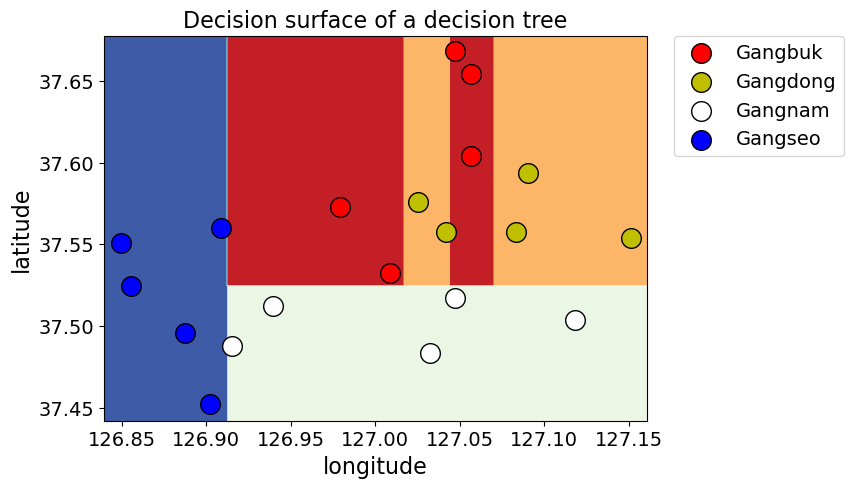

In [22]:
#의사결정에 관련된 알고리즘을 DecisionTreeClassifier이름으로 제공
#random_state파라메타: default가 None으로써 학습값이 랜덤하게 처리됨 (정수값으로 고정_동일결과를 만들기 위함)
clf = tree.DecisionTreeClassifier(random_state=35) 

# pyplot은 숫자로 표현된 레이블을 시각화할 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder() #객체 반환 
y_encoded = le.fit_transform(y_train) # fit_transform(): 입력으로 전달된 데이터를 보면서 전달된 동일 데이터를 범주화하고 숫자로 매핑해서 반환해주는 기능
print(y_encoded)

clf.fit(X_train, y_encoded) #숫자로 변환된 결과데이터를 두번째 매개변수로 전달해주면 된다.
#기존에 knn, 서포트 벡터의 알고리즘 같은 경우 결과데이터를 1차원으로 변경해서 넣어줬었음. -> 그때 데이터는 바이너리형 데이터였음
#유의) 의사결정트리에서는 결과값 자체를 숫자의 값으로만 전달을 받아서 처리를 수행할 수 있게끔 정의가 되어져 있음
#      그렇기 때문에 이 결과의 값을 숫자값으로 변환을 해줘야한다!!

#강서 3, 강남 2, 강북 0, 강동 1

display_decision_surface(clf, X_train, y_encoded, le) #학습이 끝난 뒤에는 시각화 함수를 호출

### 파라미터 의미
* max_depth : tree의 최대 한도 깊이
* min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 갯수
* min_samples_leaf : 맨 마지막 끝 노드의 최소 데이터 갯수
* random_state : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터   
  (defalt는 None으로 매번 다르게 결과가 나오게 됨)

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4816\2177444538.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4816\2177444538.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4816\2177444538.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4816\2177444538.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude,


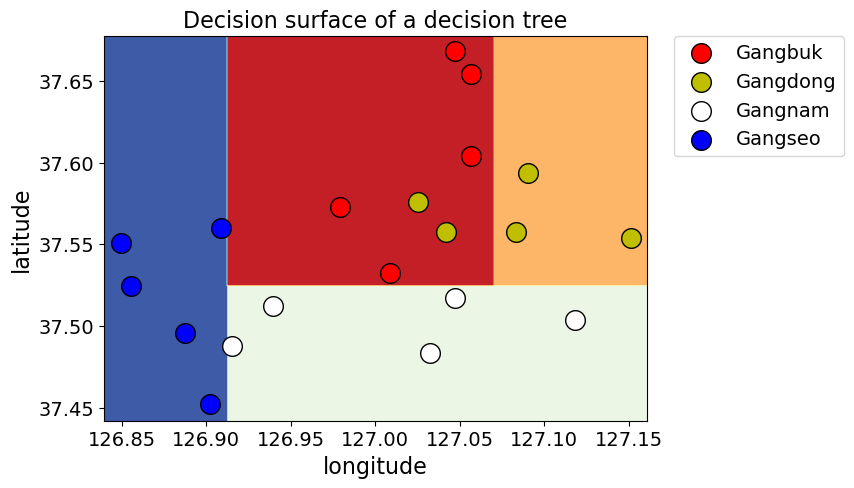

In [23]:
#해석을 해보면 과대적합되어져 있는 것을 알 수 있다. (훈련데이터에 최적화되어져 있음)
#의사결정트리의 최고 단점은 과대적합임 / 알고리즘에 대한 이해가 가장 쉬운 것이 장점임 

#***과대적합에 빠지지 않게끔 처리***하기 위해서 의사결정트리의 값을 셋팅해줄 때 max_depth(default가 6-7임)를 잘라줌_4로 지정 
#의사결정트리는 트리의 형태로써 영향력있는 핏쳐를 상위에 두면서 처리를 해주고 있음. 실제 사이킷런에서는 지니계수를 사용하고 있었음.
#depth(질문을 의미함)가 길어지면 길어질수록 학습데이터에 최적화되어지는 것이다. 
clf = tree.DecisionTreeClassifier(random_state=35,
                                   max_depth=4,
                                   min_samples_split=2,
                                   min_samples_leaf=2) 

clf.fit(X_train, y_encoded.ravel())
display_decision_surface(clf, X_train, y_encoded, le)

### 의사결정트리 시각화

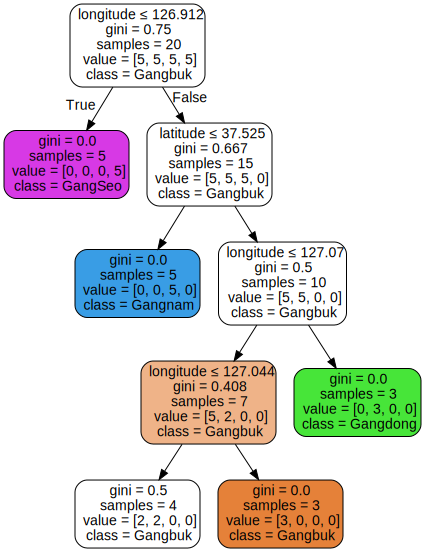

In [26]:
#운영체제에 맞는 시각화 툴을 먼저 다운로드 해야 함 
#=> https://graphviz.org/download/ -> Windows -> graphviz-8.0.5 (64-bit) EXE installer [sha256]클릭
#   exe실행 -> 다음 다음 누르고 all users 체크 -> 쭉 다음 눌러서 설치하기
#가상환경에서 다운로드 받은 툴을 설치할 수 있는 패키지를 설치!!
#아나콘다 프롬프트 접속 -> conda activate tf_cpu -> conda install python-graphviz -> y

import graphviz

dot_data = tree.export_graphviz(clf, out_file=None) #입력으로 최적화 모델을 넣어주도록 함 / 최적화된 모델을 시각화 툴에 적용할 수 있는 변환된 객체를 담고 있는 변수 생성
graph = graphviz.Source(dot_data)
graph.render('seoul') #파일로도 만들어놓음. seoul.pdf로 만들어져있는 것을 확인할 수 있음.

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['longitude', 'latitude'],
                                class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'GangSeo'],
                                filled=True, rounded=True, special_characters=True) #시각화할 때 모양에 대한 셋팅 정보들
graph = graphviz.Source(dot_data)
graph

#지니계수(얼마만큼의 불순도인지)를 엔트로피(얼만큼의 부정확성을 제거할 수 있느냐)로 생각. 
#최상위(경도데이터)는 최종적으로 4가지로 분류하는 것에 있어서 가장 비중이 높은 핏쳐로 계산되어진 것임 
#위도의 값이 37.252보다 작으면 강남을 완전히 분류시키는 방식

#핏쳐에 따른 특징을 보고 어떤 특징을 먼저 최상위에 놓아야 빠르게 분류가 될 수 있느냐에 우선순위를 정하는 알고리즘이 의사결정 트리인 것임
#지금 현재 어떻게 구조를 잡았다는 것을 시각화하여 보여주는 것(어떠한 형태로 알고리즘을 담았는지)이다. 의사결정트리의 장점이다.
#gini계수를 0으로 만드는 것이 목적이 되는 것임 _ 엔트로피가 0이 되었을 때 의미의 부정확성이 완전히 해소되는 것임


# 5. 테스트

In [27]:
from sklearn.metrics import accuracy_score

#데이터에 대한 예측을 하는 기능은 모든 알고리즘들이 predict의 이름으로 제공해주고 있음
pred = clf.predict(X_test) 

#반환되는 값을 보면 의사결정 트리에서 예측되어지는 값을 
#숫자형으로 바꿨었던 데이터를 원래 String값으로 출력을 해줘야 직접적인 비교가 수월해짐
print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 1.0


In [28]:
comparision = pd.DataFrame({'모델 예측값':le.classes_[pred], '정답':y_test.values.ravel()})
comparision

,모델 예측값,정답
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


In [ ]:
# [의사결정 트리 - 질문에서 정답에 근접한 범위로 줄여갈 수 있도록 질문에 우선순위를 추출하는 알고리즘]
#분류에 적용할 수 있는 머신러닝 알고리즘, 회귀용으로도 사용을 할 수 있음
#머신러닝(기계학습) -> 대표적인 예측 알고리즘임

#데이터를 분석할 때 범주형변수와 연속형변수로 나눌 수 있었음. (크게 두가지로 결과값을 추론할 수 있음)
#연속형으로 예측할 때 key에 대한 여러 value를 전달받을 수 있을 것이다.

#분류는 남자냐 여자냐, 포지션이 슈팅가드냐 센터냐의 의미고, 회귀는 연속적인 값을 예측하는 것이다.(데이터를 전달받아서 키나 몸무게 예측)
#의사결정트리는 분류와 회귀를 둘 다 적용할 수 있는 지도학습 알고리즘이다.
#-> 여러 특징 속에서 분류(결과값)에 큰 영향을 끼치는 특징을 찾아가는 알고리즘이다. (특징은 데이터가 주어졌을 때 DB에서 컬럼항목의미)

#20고개의 개념과 상당히 유사한 알고리즘이다. => 술레가 한사람, 나머지 여러 사람들이 술레가 생각하고 있는 질문을 통해 하나의 값을 맞추는 것
#질문의 방향성에 따라서 술레에 생각한 바를 예측하면서 범위를 줄여가야함. (정답에 근접한 범위를 빠르게 유추할 수 있는 질문을 상위에 둬야 함)
#의사결정트리는 주어진 데이터의 특징들이 있고 그 특징이 질문거리가 된다. 핏쳐별 특징의 우선순위를 정하도록 해야함

#결과를 이끌어낼 특징을 수학적으로 어떻게 계산을 해내고 있는 것인가
#확률로 표현하는데 확률값이 1이라는 의미로 불확실성(정답에 근접하지 못한 정도를 수치적으로 계산한 것)을 표현함
#엔트로피(불확실성이 얼마만큼 해소했는가를 수식으로 표현): 정보라는 데이터의 표현수단을 확률적 수치로 설명하고 있는 학문임 
#의사결정 트리는 엔트로피의 계산을 통해서 우선순위를 결정함 / 아무질문도 하지 않았을 때 불확실성이 1임
#ppt: -남자 * log(남자) - 여자 * log(여자)
#     남자확률 -> 전체 갯수 분의 남자의 데이터 갯수, 여자확률 -> 전체 갯수 분의 여자의 데이터 갯수

#군대라는 핏쳐를 가지고 엔트로피를 계산 0(불확실성이 100% 사라짐) => 정보이득의 값이 크기 때문에 상위에 둠
#긴생머리의 핏쳐를 가지고 있으면 엔트로피 계산 0.966 (정보이득: 0.034)
#질문을 상단에 뒀을 때 원하는 정보를 빠르게 취득할 수 있도록 하는 것이 의사결정트리의 핵심임

#정보이득: 질문 전에 엔트로피값에서 질문후에 엔트로피값을 뺀 것을 정보이득이라고 불러주고 있음
#          => 질문하고난 다음에 엔트로피값을 계산했는데 0.2정도의 엔트로피값이 나왔다면 0.2값을 빼주면 0.8이 나옴
#             불확실성이 20% 해소되면 정보이득이 80%인 것이다.


#좀 더 효율적으로 의사결정 알고리즘을 정의하는데 바이너리로(이진분류_결과가 두 개인 것) 예측을 하면 된다고 할 때 지니계수를 사용할 수 있음
#엔트로피를 효율적으로 계산하게끔 제공해주는 알고리즘을 적용한 개념이 지니계수임 -> 사이킷런에서는 지니계수를 적용해서 처리하게끔 제공함
#지니계수를 적용하고 있는 분류에 이진 트리 -> CART ex) 해시알고리즘 -> 방을 만들면서 분리하여 빠르게 데이터를 검색하도록 함
#지니계수의 특징은 값이 크게 나오면 순도(군필을 거쳤더니 완전히 분리됨)가 높다고 판단, 불순도가 높다는 것은 지니계수가 큰 것으로 분리할 값들이 많이 남아있는것
#           불순도를 제거하고 순도를 높게 하는 것이 중요함. / 동일한 비교인데 하나하나씩 다 비교하는 것이 아니라 원개념을 분리하여 수식을 덜 계산하게끔 한다.

#상관계수 -> 1은 관련있음, 0은 아예 관련없음, -1 성질이 완전히 반대인것
